In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import tensorflow
from tensorflow.keras.models import Sequential 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,Bidirectional,LSTM,Dense,Dropout
from tensorflow.keras.utils import to_categorical

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
df=pd.read_csv('/kaggle/input/post-data-x1/Pst data - Copy of Set of work 2 - Sheet1.csv.csv')
df.head(20)

,clean_post,category
0,My brother in-law (Sammy) lost his home shortl...,-1.0
1,Iâve enjoyed reading and posting on this sub...,0.0
2,"I'm back like I said I would be,. My [original...",-1.0
3,I'll try to keep this short. I had a [1967 Imp...,-1.0
4,I want to sincerely thank everyone who comment...,-1.0
5,I am a high schooler with a weekend job at a c...,1.0
6,"Hello, everyone. First of all, thank you all f...",-1.0
7,"Note. My step-daughter, Madeline, was about a ...",0.0
8,We had a family dinner this evening. My family...,-1.0
9,Iâve become frustrated with how quick a lot ...,1.0


# Exploratory Data Analysis

In [4]:
dist=list(df.category)
pp=[0,0,0]
for i in dist:
    if i==-1:
        pp[0]+=1
    elif i==0:
        pp[1]+=1
    else:
        pp[2]+=1
print(pp)
        


[3965, 3319, 5564]


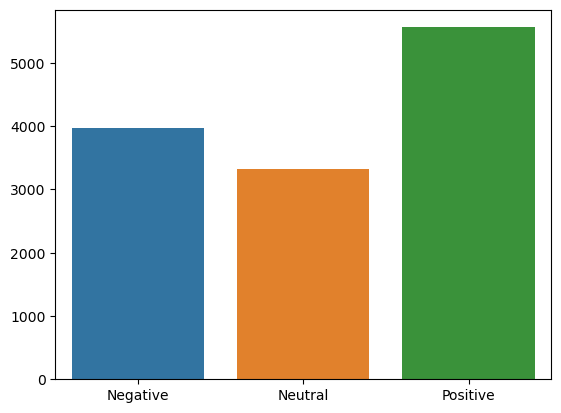

In [5]:
labels=['Negative','Neutral','Positive']
sns.barplot(x=labels,y=pp)
plt.show()

In [6]:
post=list(df.clean_post.astype(str))
sentiment=list(df.category)
reddit_dict=dict(zip(post,sentiment))

In [7]:
print(list(reddit_dict.items())[:5])

[('My brother in-law (Sammy) lost his home shortly after his divorce 10 months ago. He moved in with us and brought his twin daughters (Olivia & Sloane18) with him a couple of months ago.\nHis sister (my wife) and I have one daughter (Zoey 16) and she and her cousins aren\'t close but get along fine.\n\nOlivia & Sloane have no respect for Zoey\'s privacy, none. they used to walk into her room and take everything they get their hands on. Makeup, phone accessories, clothes, school laptop etc. Zoey complained a lot and I\'ve already asked the girls to respect Zoey\'s privacy and stop taking things. My wife and Sammy saw no issue with this. After all, they\'re girls and this\'s typical teenage girls behavior. I completely disagreed. \n\nLast straw was when Zoey bought a 60$ m.a.c makeup-kit that looks like a paintset that she saved up for over a month and one of the girls, Sloane took it without permission and ruined it by mixing shades together while using it. Don\'t know much about makeu

In [8]:
Neg_list=[]
Pos_list=[]
Neutral_list=[]
for i,j in reddit_dict.items():
    if j==-1:
        Neg_list.append(i)
    elif j==0:
        Neutral_list.append(i)
    else:
        Pos_list.append(i)    

In [9]:
print(Neg_list[:2],'\n',Neutral_list[:2],'\n',Pos_list[:2])

['My brother in-law (Sammy) lost his home shortly after his divorce 10 months ago. He moved in with us and brought his twin daughters (Olivia & Sloane18) with him a couple of months ago.\nHis sister (my wife) and I have one daughter (Zoey 16) and she and her cousins aren\'t close but get along fine.\n\nOlivia & Sloane have no respect for Zoey\'s privacy, none. they used to walk into her room and take everything they get their hands on. Makeup, phone accessories, clothes, school laptop etc. Zoey complained a lot and I\'ve already asked the girls to respect Zoey\'s privacy and stop taking things. My wife and Sammy saw no issue with this. After all, they\'re girls and this\'s typical teenage girls behavior. I completely disagreed. \n\nLast straw was when Zoey bought a 60$ m.a.c makeup-kit that looks like a paintset that she saved up for over a month and one of the girls, Sloane took it without permission and ruined it by mixing shades together while using it. Don\'t know much about makeup

In [10]:
pos_len=[]
for i in Pos_list:
    pos_len.append(len(i))

In [11]:
neg_len=[]
for i in Neg_list:
    neg_len.append(len(i))

In [12]:
Neutral_len=[]
for i in Neutral_list:
    Neutral_len.append(len(i))

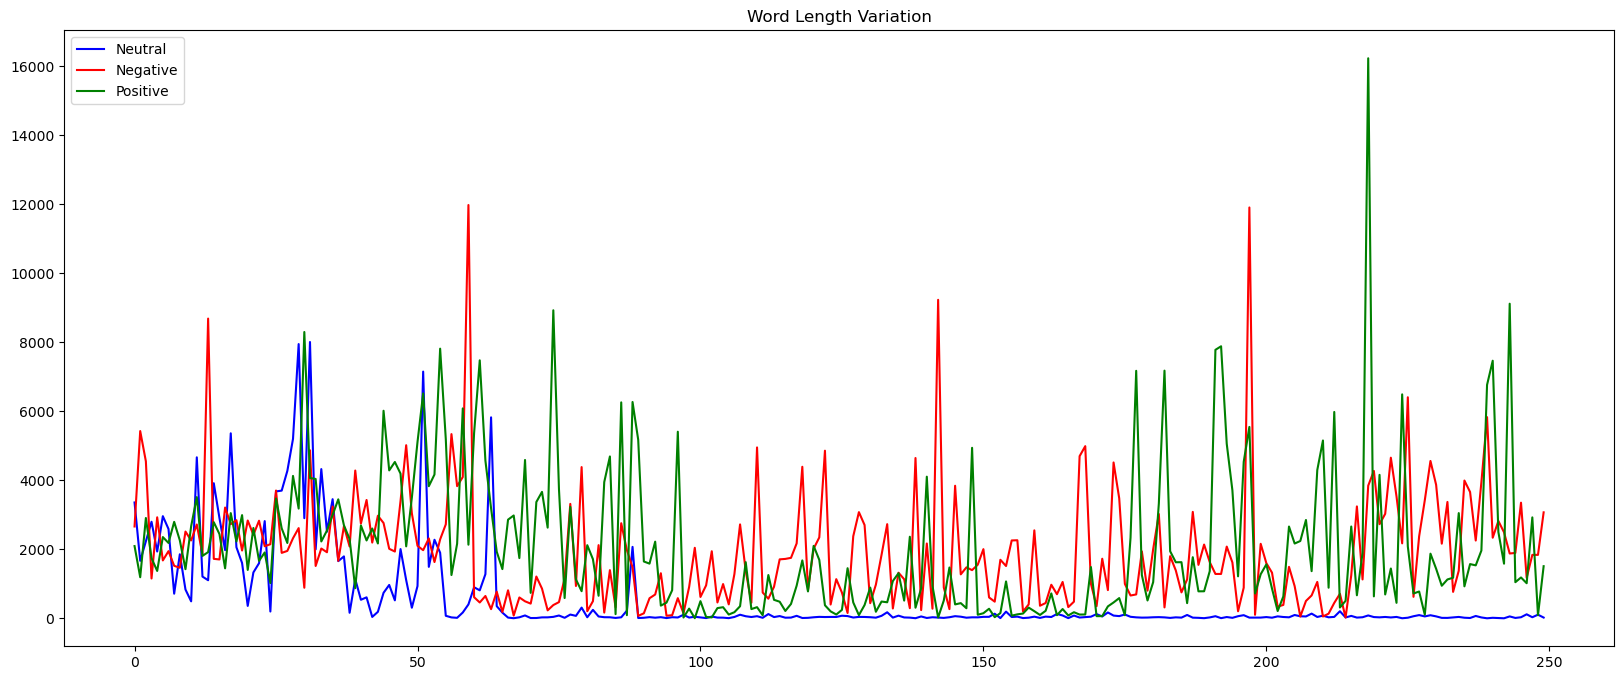

In [13]:
plt.subplots(figsize=(20,8))
plt.title("Word Length Variation")
plt.plot(Neutral_len[:250],c='b',label='Neutral')
plt.plot(neg_len[:250],c='r',label='Negative')
plt.plot(pos_len[:250],c='g',label='Positive')
plt.legend(loc='upper left')
plt.show()

In [14]:
pos_mean=sum(pos_len)//len(pos_len)
neg_mean=sum(neg_len)//len(neg_len)
neutral_mean=sum(Neutral_len)//len(Neutral_len)
combined_mean=(sum(pos_len)+sum(neg_len)+sum(Neutral_len))//(len(pos_len)+len(neg_len)+len(Neutral_len))

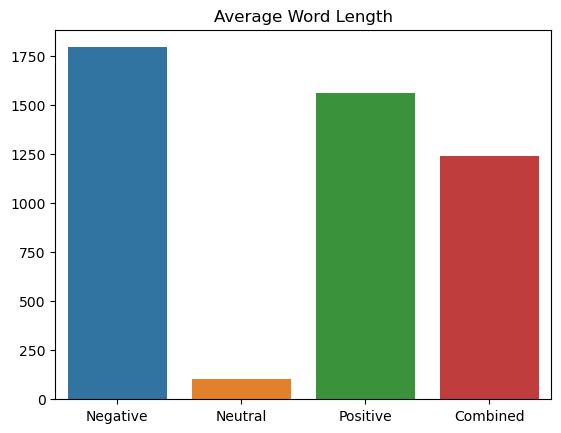

In [15]:
plt.title("Average Word Length")
sns.barplot(x=['Negative','Neutral','Positive','Combined'],y=[neg_mean,neutral_mean,pos_mean,combined_mean])
plt.show()

# Tokeinzer


In [16]:
X=df['clean_post'].astype('str')
X[:5]

0    My brother in-law (Sammy) lost his home shortl...
1    Iâve enjoyed reading and posting on this sub...
2    I'm back like I said I would be,. My [original...
3    I'll try to keep this short. I had a [1967 Imp...
4    I want to sincerely thank everyone who comment...
Name: clean_post, dtype: object

In [17]:
lp=""
for i in X:
    lp+=i+" "
print(lp[:100])

My brother in-law (Sammy) lost his home shortly after his divorce 10 months ago. He moved in with us


In [18]:
st=lp.split(' ')
dict_len=len(set(st))

In [19]:
dict_len,len(st)

(182292, 2759285)

In [20]:
tokenizer=Tokenizer(num_words=dict_len,lower=True,oov_token="OOV")
tokenizer.fit_on_texts(X)

In [21]:
len(tokenizer.word_index)


68616

In [ ]:
X_train=tokenizer.texts_to_sequences(X)
X_train_padded=pad_sequences(X_train,maxlen=256,padding='post',truncating='post')

# One Hot Encode The Sentiment Values

In [33]:
df['category']=df['category'].replace({-1:2})

In [34]:
mp={0:"Neutral",1:"Positve",-1:"Negative"}

In [35]:
Y=df['category'].values

In [36]:
Y_hot=to_categorical(Y)

In [37]:
print(Y_hot[:3])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


# The Model

In [46]:
model=Sequential()
model.add(Embedding(dict_len,64,input_length=256))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(256,return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(512,return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(700)))
model.add(Dense(3,activation='softmax'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 256, 64)           11666688  
                                                                 
 dropout_9 (Dropout)         (None, 256, 64)           0         
                                                                 
 bidirectional_9 (Bidirectio  (None, 256, 512)         657408    
 nal)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 256, 512)          0         
                                                                 
 bidirectional_10 (Bidirecti  (None, 256, 1024)        4198400   
 onal)                                                           
                                                                 
 dropout_11 (Dropout)        (None, 256, 1024)        

In [47]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')


In [48]:
hist=model.fit(X_train_padded,Y_hot,epochs=5,validation_split=0.2)

Epoch 1/5
322/322 [==============================] - 129s 369ms/step - loss: 0.6729 - accuracy: 0.6969 - val_loss: 1.6066 - val_accuracy: 0.4424
Epoch 2/5
322/322 [==============================] - 104s 324ms/step - loss: 0.5685 - accuracy: 0.7274 - val_loss: 3.5272 - val_accuracy: 0.4821
Epoch 3/5
322/322 [==============================] - 95s 294ms/step - loss: 0.5590 - accuracy: 0.7346 - val_loss: 2.2163 - val_accuracy: 0.4471
Epoch 4/5
322/322 [==============================] - 93s 289ms/step - loss: 0.7556 - accuracy: 0.6714 - val_loss: 1.4455 - val_accuracy: 0.3051
Epoch 5/5
322/322 [==============================] - 88s 273ms/step - loss: 0.6563 - accuracy: 0.7254 - val_loss: 2.4229 - val_accuracy: 0.4525


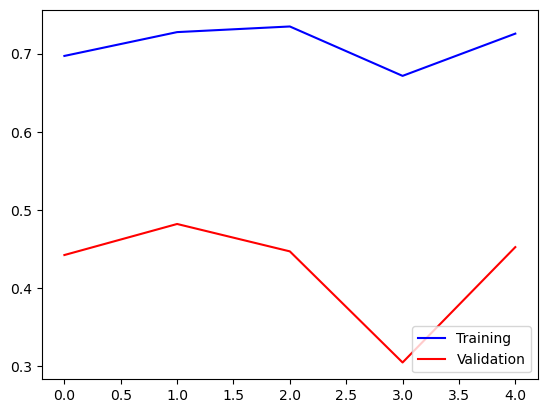

In [49]:
plt.plot(hist.history['accuracy'],c='b',label='Training')
plt.plot(hist.history['val_accuracy'],c='r',label='Validation')
plt.legend(loc='lower right')
plt.show()

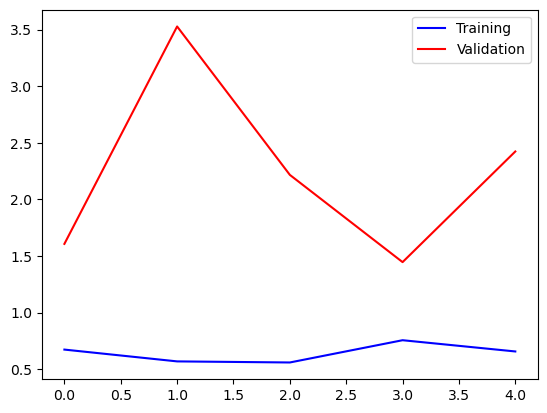

In [50]:
plt.plot(hist.history['loss'],c='b',label='Training')
plt.plot(hist.history['val_loss'],c='r',label='Validation')
plt.legend(loc='upper right')
plt.show()

new plot

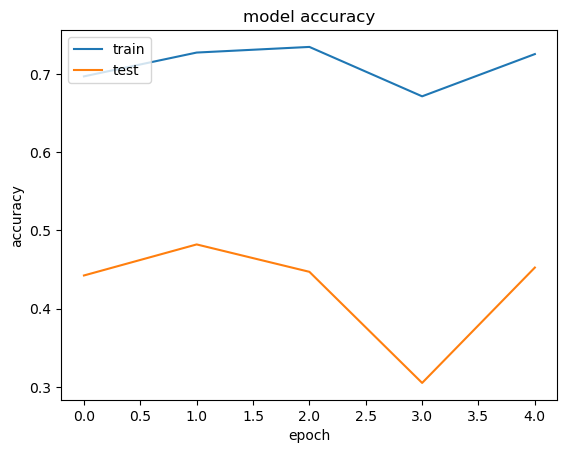

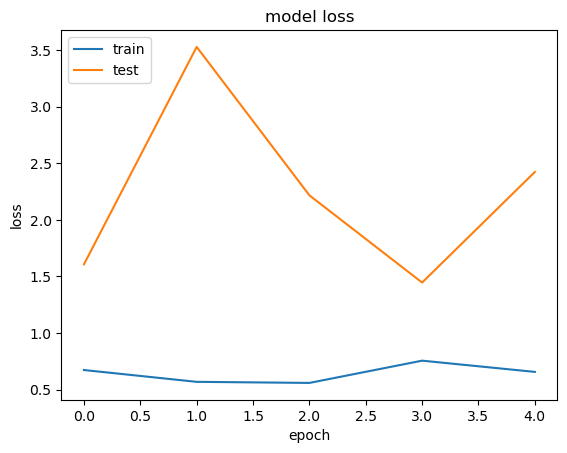

In [52]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Accuracy, Precision, Recall, F1-Score

In [3]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))

NameError: name 'model' is not defined